In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import math
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
from sklearn.metrics import mean_squared_error,mean_absolute_error



from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.gofplots import ProbPlot


from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

no display found. Using non-interactive Agg backend


URL to download data: https://www.huduser.gov/portal/datasets/hads/hads.html

In [2]:
df_2011 = pd.read_csv('thads2011.csv')
df_2013 = pd.read_csv('thads2013n.csv')

In [3]:
df_2011.head()

,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,...,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
0,'036000001146',34,'2','4',84200,2580,24950,41550,66500,17849,...,'3 GT FMR','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','.','2 30% to 50%','West','-5'
1,'036000001147',43,'2','4',84200,2241,27700,46150,73850,22629,...,'3 GT FMR','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','.','1 Less than 30%','West','-5'
2,'036000001149',60,'2','4',84200,2577,24950,41550,66500,17399,...,'3 GT FMR','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','.','1 Less than 30%','West','-5'
3,'036000001150',37,'2','4',84200,2241,22200,36950,59100,14985,...,'3 GT FMR','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','.','2 30% to 50%','West','-5'
4,'036000001151',33,'2','4',84200,2580,27700,46150,73850,22557,...,'3 GT FMR','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','.','2 30% to 50%','West','-5'


In [4]:
df_2013.head()

,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,...,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
0,'100003130103',82,'3','1',73738,956,15738,26213,40322,11067,...,'1 LTE 50% FMR','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','.','2 30% to 50%','-5','-5'
1,'100006110249',50,'5','3',55846,1100,17165,28604,45744,24218,...,'3 GT FMR','4 60 - 80% AMI','4 60 - 80% AMI','6 100 - 120% AMI','4 60 - 80% AMI','7 120% AMI +','.','1 Less than 30%','-5','-5'
2,'100006370140',53,'5','3',55846,1100,13750,22897,36614,15470,...,'2 50.1 - 100% FMR','4 60 - 80% AMI','5 80 - 100% AMI','6 100 - 120% AMI','4 60 - 80% AMI','4 60 - 80% AMI','.','3 50% or More','-5','-5'
3,'100006520140',67,'5','3',55846,949,13750,22897,36614,13964,...,'2 50.1 - 100% FMR','6 100 - 120% AMI','7 120% AMI +','7 120% AMI +','5 80 - 100% AMI','4 60 - 80% AMI','.','1 Less than 30%','-5','-5'
4,'100007130148',26,'1','3',60991,737,14801,24628,39421,15492,...,'3 GT FMR','3 50 - 60% AMI','3 50 - 60% AMI','3 50 - 60% AMI','3 50 - 60% AMI','7 120% AMI +','0 Not Assisted','1 Less than 30%','-5','-5'


# 1.Task 1

## 1.1 Data cleaning

In [5]:
#Slice the 2013 data according to the instuctions
df = df_2013[(df_2013['TYPE']==1) & (df_2013['STRUCTURETYPE']==1)&
             (df_2013['VALUE']>=1000)]

In [6]:
#No null values found
df.isnull().values.any()

False

In [7]:
variable_lst=['CONTROL', 'AGE1', 'METRO3', 'REGION', 'LMED', 'FMR','IPOV', 'BEDRMS', 'BUILT', 
            'STATUS', 'TYPE', 'VALUE','NUNITS', 'ROOMS','PER', 'ZINC2', 'ZADEQ', 'ZSMHC','STRUCTURETYPE', 
            'OWNRENT','UTILITY', 'OTHERCOST','COST06', 'COST12','COST08', 'COSTMED','ASSISTED',
            'APLMED']
df=df.loc[:,variable_lst]

In [8]:
#Group variables according to their datatypes
type_dct = {str(k): list(v) for k, v in df.groupby(df.dtypes, axis=1)}
type_dct['object'].remove('CONTROL')
cat_lst=type_dct['object']
print('Categorical variables:',cat_lst)

int_lst=type_dct['int64']
float_lst=type_dct['float64']
cont_lst=int_lst+float_lst
print('Continuous variables:',cont_lst)

Categorical variables: ['METRO3', 'REGION', 'STATUS', 'ZADEQ', 'OWNRENT']
Continuous variables: ['AGE1', 'LMED', 'FMR', 'IPOV', 'BEDRMS', 'BUILT', 'TYPE', 'VALUE', 'NUNITS', 'ROOMS', 'PER', 'ZINC2', 'ZSMHC', 'STRUCTURETYPE', 'ASSISTED', 'UTILITY', 'OTHERCOST', 'COST06', 'COST12', 'COST08', 'COSTMED', 'APLMED']


### Continuous variables

In [9]:
#Check for negative values in continuous variables
neg_lst=df[cont_lst].columns[df[cont_lst].describe().T['min']<0]
neg_lst
#These variables have negative values,examine them

Index(['AGE1', 'IPOV', 'PER', 'ZINC2', 'ZSMHC', 'ASSISTED', 'APLMED'], dtype='object')

In [10]:
#These are error entries. Drop them from the dataframe
df[neg_lst][(df[neg_lst]<0).all(1)]

,AGE1,IPOV,PER,ZINC2,ZSMHC,ASSISTED,APLMED
115,-9,-6,-6,-6,-6,-9,-9.0
227,-9,-6,-6,-6,-6,-9,-9.0
297,-9,-6,-6,-6,-6,-9,-9.0
309,-9,-6,-6,-6,-6,-9,-9.0
313,-9,-6,-6,-6,-6,-9,-9.0
...,...,...,...,...,...,...,...
64356,-9,-6,-6,-6,-6,-9,-9.0
64360,-9,-6,-6,-6,-6,-9,-9.0
64397,-9,-6,-6,-6,-6,-9,-9.0
64426,-9,-6,-6,-6,-6,-9,-9.0


In [11]:
error=df[neg_lst][(df[neg_lst]<0).all(1)].index
df.drop(error,axis=0,inplace=True)
#drop also ZINC2<0 for later log-transformation
df=df[df.ZINC2>0]

In [12]:
df

,CONTROL,AGE1,METRO3,REGION,LMED,FMR,IPOV,BEDRMS,BUILT,STATUS,...,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,ASSISTED,APLMED
0,'100003130103',82,'3','1',73738,956,11067,2,2006,'1',...,1,'1',169.000000,213.750000,648.588189,803.050535,696.905247,615.156712,-9,51616.6
1,'100006110249',50,'5','3',55846,1100,24218,4,1980,'1',...,1,'1',245.333333,58.333333,1167.640781,1669.643405,1324.671218,1058.988479,-9,55846.0
2,'100006370140',53,'5','3',55846,1100,15470,4,1985,'1',...,1,'1',159.000000,37.500000,1193.393209,1772.627006,1374.582175,1068.025168,-9,44676.8
3,'100006520140',67,'5','3',55846,949,13964,3,1985,'1',...,1,'1',179.000000,70.666667,1578.857612,2351.169341,1820.442900,1411.700224,-9,44676.8
6,'100007540148',50,'1','3',60991,988,18050,3,1985,'1',...,1,'1',236.000000,75.000000,2038.948229,3042.953477,2353.009103,1821.643625,-9,54891.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64509,'999900056714',62,'1','1',89526,1256,15492,2,1960,'1',...,1,'1',131.000000,100.000000,2889.381891,4434.005349,3372.552466,2555.067115,-9,71620.8
64511,'999900056716',50,'2','1',79200,929,12019,1,1950,'1',...,1,'1',529.333333,125.000000,3179.796129,4647.188415,3638.808176,2862.197093,-9,55440.0
64512,'999900056719',58,'2','1',95372,1877,18097,3,1980,'1',...,1,'1',330.250000,6.666667,3061.758105,4644.997149,3557.007944,2719.085460,-9,85834.8
64514,'999900056749',84,'2','1',86324,1721,14007,3,1920,'1',...,1,'1',226.333333,91.666667,2644.084154,3995.629680,3066.858408,2351.558726,-9,69059.2


In [13]:
df[cont_lst].columns[df[cont_lst].describe().T['std']==0]
#we delete columns with std==0,meaning that they are homoegeneous

Index(['TYPE', 'NUNITS', 'STRUCTURETYPE', 'ASSISTED'], dtype='object')

In [14]:
df.drop(columns=['TYPE','NUNITS','STRUCTURETYPE','ASSISTED'],inplace=True)

In [15]:
cont_lst=[x for x in cont_lst if x not in ['TYPE','NUNITS','STRUCTURETYPE','ASSISTED']]

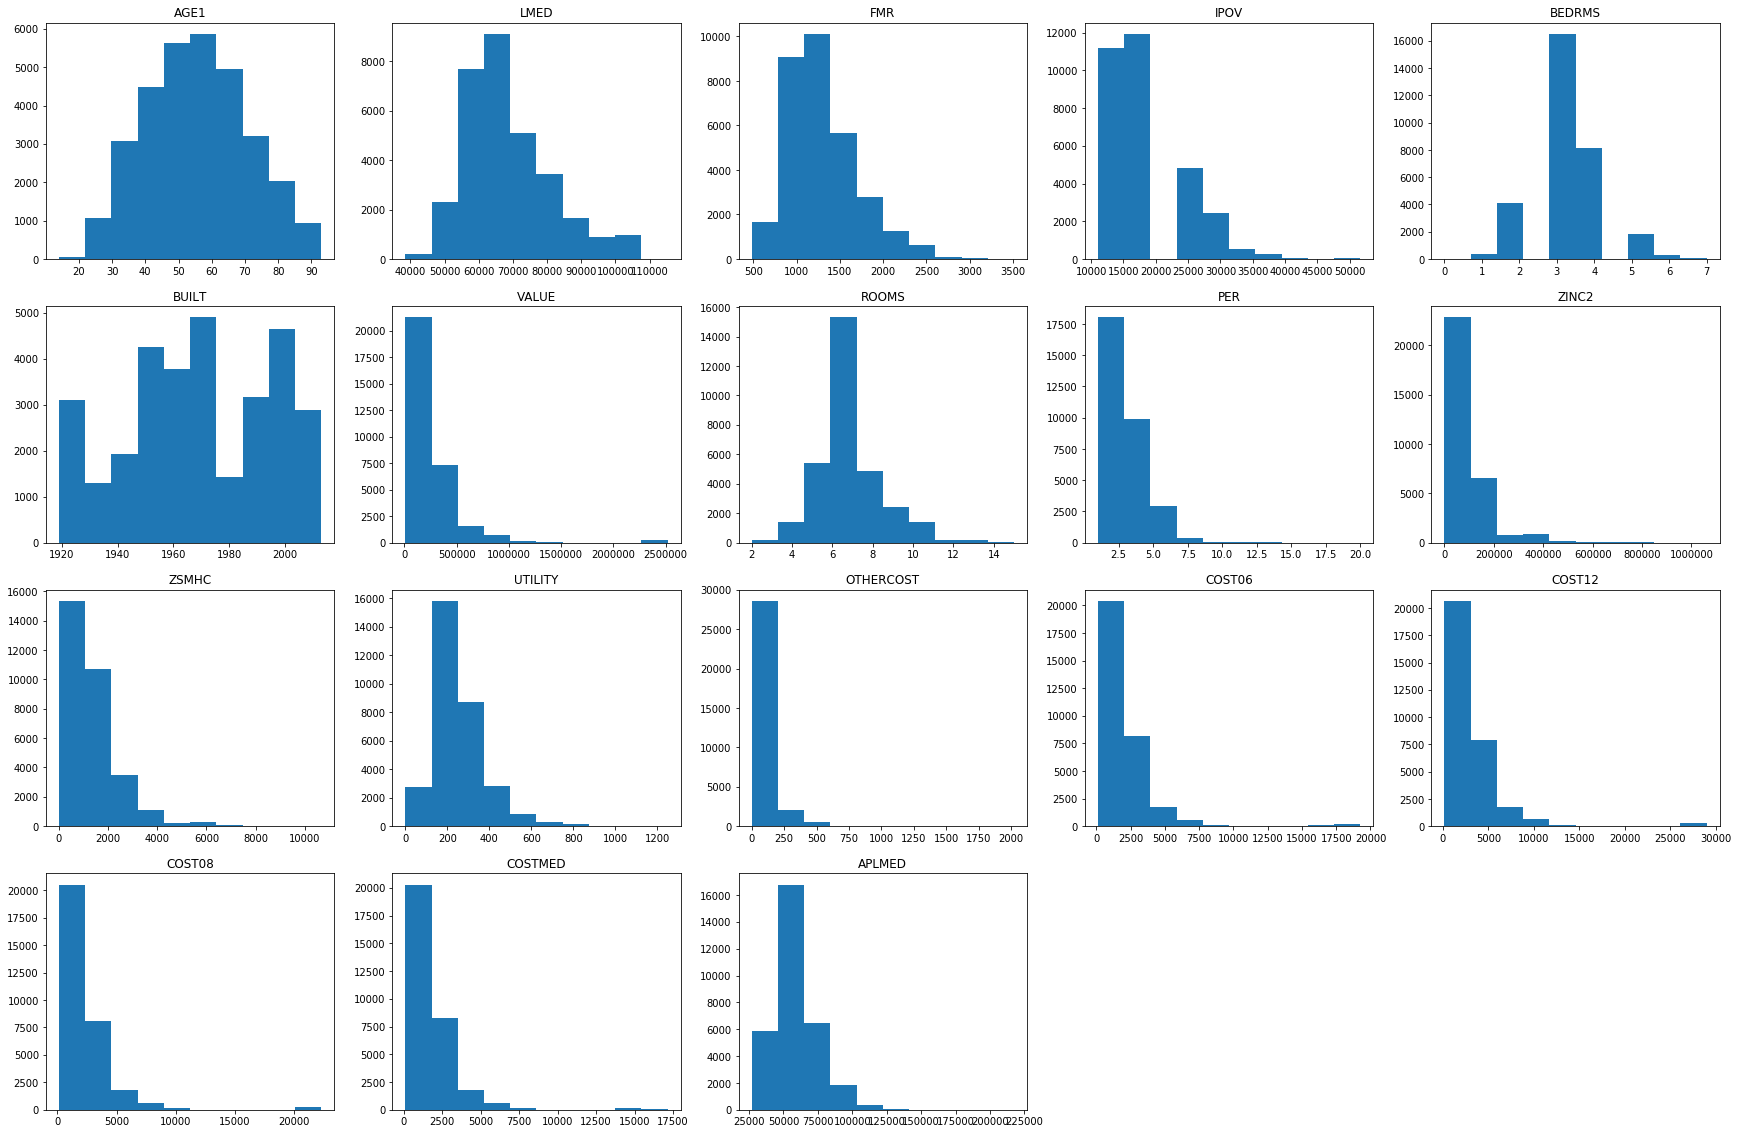

In [16]:
#plot all continuous variables
fig, axes = plt.subplots(4,5, figsize=(30, 20))
counter=0
for i in range(4):
    for j in range(5):
        ax=axes[i][j]
        if counter<len(cont_lst):
            ax.hist(df[cont_lst[counter]])
            ax.set_title(cont_lst[counter])
        else:
            ax.set_axis_off()
        counter+=1
plt.show()

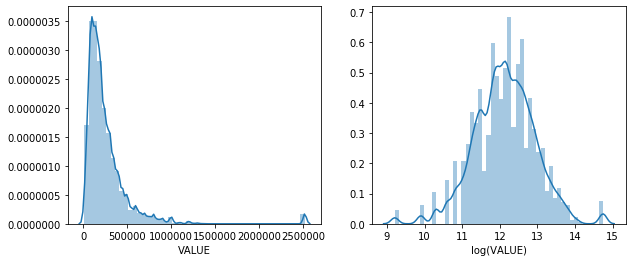

In [17]:
#distplot VALUE and log(VALUE)
fig,ax=plt.subplots(1,2,figsize=(10,4))
sns.distplot(df['VALUE'],ax=ax[0])
sns.distplot(np.log(df['VALUE']),ax=ax[1])
ax[1].set(xlabel='log(VALUE)')
plt.show()
#log(VALUE) mostly conforms the normal distribution and we will use this as the response variable in the following
#We can discover there are outliers at VALUE>2500000

In [18]:
#Remove outliers
df=df[df.VALUE<2500000]

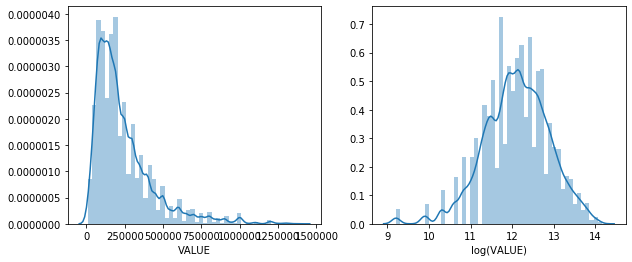

In [19]:
fig,ax=plt.subplots(1,2,figsize=(10,4))
sns.distplot(df['VALUE'],ax=ax[0])
sns.distplot(np.log(df['VALUE']),ax=ax[1])
ax[1].set(xlabel='log(VALUE)')
plt.show()

### Categorical variables

In [20]:
df[cat_lst].describe().T

,count,unique,top,freq
METRO3,31061,5,'2',13478
REGION,31061,4,'3',9379
STATUS,31061,1,'1',31061
ZADEQ,31061,3,'1',30234
OWNRENT,31061,1,'1',31061


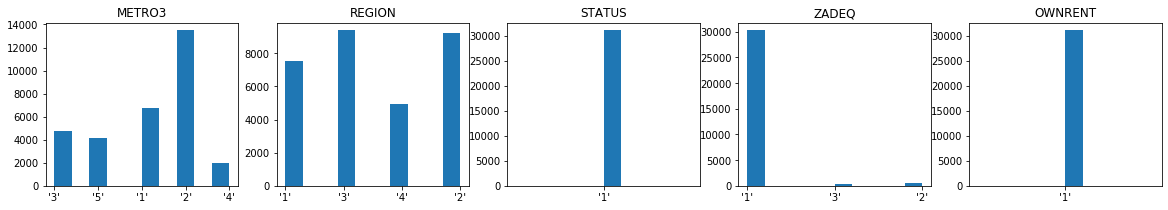

In [21]:
#plot categorical variables
plt.figure(figsize=(20,3))
for i in range(5):
        plt.subplot(1,5,i+1)
        plt.hist(df.loc[:,cat_lst[i]])
        plt.title(cat_lst[i])

- Drop STATUS, OWNRENT. Add dummies for METRO3, REGION, and ZADEQ

In [22]:
df.drop(columns=['STATUS','OWNRENT'],inplace=True)
df['METRO3'] = df['METRO3'].apply(lambda x: 1 if x=="'1'" else 0)
df['REGION']=df['REGION'].str.replace("'","")
df['ZADEQ']=df['ZADEQ'].str.replace("'","")
df_whole=df.copy()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

In [23]:
df = pd.get_dummies(df,columns = ['REGION','ZADEQ'],prefix_sep='_')

In [24]:
df

,CONTROL,AGE1,METRO3,LMED,FMR,IPOV,BEDRMS,BUILT,VALUE,ROOMS,...,COST08,COSTMED,APLMED,REGION_1,REGION_2,REGION_3,REGION_4,ZADEQ_1,ZADEQ_2,ZADEQ_3
0,'100003130103',82,0,73738,956,11067,2,2006,40000,6,...,696.905247,615.156712,51616.6,1,0,0,0,1,0,0
1,'100006110249',50,0,55846,1100,24218,4,1980,130000,6,...,1324.671218,1058.988479,55846.0,0,0,1,0,1,0,0
2,'100006370140',53,0,55846,1100,15470,4,1985,150000,7,...,1374.582175,1068.025168,44676.8,0,0,1,0,1,0,0
3,'100006520140',67,0,55846,949,13964,3,1985,200000,6,...,1820.442900,1411.700224,44676.8,0,0,1,0,1,0,0
6,'100007540148',50,1,60991,988,18050,3,1985,260000,6,...,2353.009103,1821.643625,54891.9,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64509,'999900056714',62,1,89526,1256,15492,2,1960,400000,5,...,3372.552466,2555.067115,71620.8,1,0,0,0,1,0,0
64511,'999900056716',50,0,79200,929,12019,1,1950,380000,4,...,3638.808176,2862.197093,55440.0,1,0,0,0,1,0,0
64512,'999900056719',58,0,95372,1877,18097,3,1980,410000,7,...,3557.007944,2719.085460,85834.8,1,0,0,0,1,0,0
64514,'999900056749',84,0,86324,1721,14007,3,1920,350000,6,...,3066.858408,2351.558726,69059.2,1,0,0,0,1,0,0


## 1.2 Subset Selection and Model Building

In [25]:
df_x=df.drop(columns=['CONTROL','VALUE'])
df_y=df.VALUE
df_whole=df_whole.drop(columns=['CONTROL','VALUE'])

In [26]:
df_x.columns

Index(['AGE1', 'METRO3', 'LMED', 'FMR', 'IPOV', 'BEDRMS', 'BUILT', 'ROOMS',
       'PER', 'ZINC2', 'ZSMHC', 'UTILITY', 'OTHERCOST', 'COST06', 'COST12',
       'COST08', 'COSTMED', 'APLMED', 'REGION_1', 'REGION_2', 'REGION_3',
       'REGION_4', 'ZADEQ_1', 'ZADEQ_2', 'ZADEQ_3'],
      dtype='object')

In [27]:
#detect correlation among independent variables
df_whole.corr().abs().unstack().sort_values(ascending=False).drop_duplicates()[:10]

APLMED   APLMED    1.000000
COSTMED  COST06    0.999891
COST08   COST06    0.999870
COST12   COST08    0.999737
COSTMED  COST08    0.999523
COST06   COST12    0.999238
COSTMED  COST12    0.998552
IPOV     PER       0.989592
APLMED   LMED      0.772896
ROOMS    BEDRMS    0.743716
dtype: float64

- COST06,COST12,COST08,COSTMED are derivatives of VALUE, remove them

In [28]:
df_x=df_x.drop(columns=['COST06','COST12','COST08','COSTMED'])
df_whole=df_whole.drop(columns=['COST06','COST12','COST08','COSTMED'])

In [29]:
df_whole.corr().abs().unstack().sort_values(ascending=False).drop_duplicates()[:10]

APLMED  APLMED    1.000000
IPOV    PER       0.989592
LMED    APLMED    0.772896
BEDRMS  ROOMS     0.743716
FMR     LMED      0.679805
APLMED  PER       0.678949
IPOV    APLMED    0.672752
APLMED  FMR       0.634229
BEDRMS  FMR       0.476206
ZINC2   ZSMHC     0.453617
dtype: float64

- Remove highly correlated variables

In [30]:
df_x=df_x.drop(columns=['IPOV','LMED','ROOMS','APLMED'])
df_whole=df_whole.drop(columns=['IPOV','LMED','ROOMS','APLMED'])

In [31]:
df_whole.corr().abs().unstack().sort_values(ascending=False).drop_duplicates()[:10]

OTHERCOST  OTHERCOST    1.000000
FMR        BEDRMS       0.476206
ZINC2      ZSMHC        0.453617
ZSMHC      FMR          0.437927
UTILITY    ZSMHC        0.402227
PER        AGE1         0.399783
OTHERCOST  ZSMHC        0.346202
PER        BEDRMS       0.335818
ZSMHC      BEDRMS       0.324448
UTILITY    BEDRMS       0.313448
dtype: float64

In [32]:
df_x.columns

Index(['AGE1', 'METRO3', 'FMR', 'BEDRMS', 'BUILT', 'PER', 'ZINC2', 'ZSMHC',
       'UTILITY', 'OTHERCOST', 'REGION_1', 'REGION_2', 'REGION_3', 'REGION_4',
       'ZADEQ_1', 'ZADEQ_2', 'ZADEQ_3'],
      dtype='object')

In [33]:
##Fit on LOG(VALUE)
results=sm.OLS(np.log(df_y),sm.add_constant(df_x)).fit()
results.summary()

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  VALUE   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     2162.
Date:                Wed, 20 May 2020   Prob (F-statistic):               0.00
Time:                        18:25:07   Log-Likelihood:                -25174.
No. Observations:               31061   AIC:                         5.038e+04
Df Residuals:                   31045   BIC:                         5.051e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5034      0.160     15.625      0.000       2.189       2.817
AGE1           0.0053      0.000     23.135      0.000       0.005       0.006
METRO3        -0.0904      0.008    -11.754      0.000      -0.106      -0.075
FMR            0.0005   1.18e-05     40.517      0.000       0.000       0.001
BEDRMS         0.0582      0.005     12.398      0.000       0.049       0.067
BUILT          0.0033      0.000     25.492      0.000       0.003       0.004
PER           -0.0249      0.003     -9.751      0.000      -0.030      -0.020
ZINC2       1.647e-06   4.29e-08     38.368      0.000    1.56e-06    1.73e-06
ZSMHC          0.0002   4.13e-06     58.989      0.000       0.000       0.000
UTILITY     2.707e-05   3.05e-05      0.888      0.375   -3.27e-05    8.68e-05
OTHERCOST      0.0009    3.4e-05     25.574      0.000       0.001       0.001
REGION_1       0.7076      0.039     17.945      0.000       0.630       0.785
REGION_2       0.5123      0.040     12.901      0.000       0.434       0.590
REGION_3       0.5261      0.041     12.739      0.000       0.445       0.607
REGION_4       0.7574      0.042     18.197      0.000       0.676       0.839
ZADEQ_1        0.9844      0.055     17.769      0.000       0.876       1.093
ZADEQ_2        0.6957      0.056     12.395      0.000       0.586       0.806
ZADEQ_3        0.8233      0.058     14.265      0.000       0.710       0.936
==============================================================================
Omnibus:                     3593.762   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9362.362
Skew:                          -0.660   Prob(JB):                         0.00
Kurtosis:                       5.344   Cond. No.                     1.59e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.78e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

- UTILITY not statistically significant --> Remove UTILITY

In [34]:
df_x=df_x.drop(columns=['UTILITY'])
df_whole=df_whole.drop(columns=['UTILITY'])

In [35]:
results=sm.OLS(np.log(df_y),sm.add_constant(df_x)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  VALUE   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     2316.
Date:                Wed, 20 May 2020   Prob (F-statistic):               0.00
Time:                        18:25:07   Log-Likelihood:                -25174.
No. Observations:               31061   AIC:                         5.038e+04
Df Residuals:                   31046   BIC:                         5.050e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5137      0.160     15.730      0.000       2.200       2.827
AGE1           0.0053      0.000     23.404      0.000       0.005       0.006
METRO3        -0.0901      0.008    -11.726      0.000      -0.105      -0.075
FMR            0.0005   1.18e-05     40.533      0.000       0.000       0.001
BEDRMS         0.0588      0.005     12.662      0.000       0.050       0.068
BUILT          0.0033      0.000     25.492      0.000       0.003       0.004
PER           -0.0244      0.003     -9.757      0.000      -0.029      -0.020
ZINC2       1.649e-06   4.29e-08     38.448      0.000    1.56e-06    1.73e-06
ZSMHC          0.0002      4e-06     61.112      0.000       0.000       0.000
OTHERCOST      0.0009    3.4e-05     25.578      0.000       0.001       0.001
REGION_1       0.7110      0.039     18.118      0.000       0.634       0.788
REGION_2       0.5144      0.040     12.978      0.000       0.437       0.592
REGION_3       0.5288      0.041     12.836      0.000       0.448       0.610
REGION_4       0.7595      0.042     18.278      0.000       0.678       0.841
ZADEQ_1        0.9880      0.055     17.879      0.000       0.880       1.096
ZADEQ_2        0.6992      0.056     12.489      0.000       0.589       0.809
ZADEQ_3        0.8265      0.058     14.349      0.000       0.714       0.939
==============================================================================
Omnibus:                     3591.570   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9359.656
Skew:                          -0.659   Prob(JB):                         0.00
Kurtosis:                       5.344   Cond. No.                     1.70e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.56e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

- All variables are significant. Test if the underlying assumptions hold

In [36]:
# fitted values
model_fitted_y = results.fittedvalues
# residuals
model_residuals = results.resid
# normalized residuals
model_norm_residuals = results.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

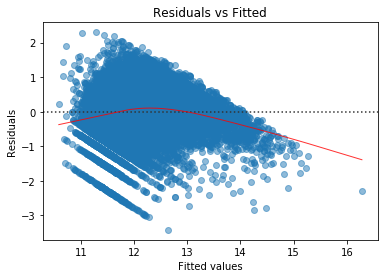

In [37]:
#Normality of residuals tests
#1.Residuals vs Fitted values
plot_lm = plt.figure()
plot_lm.axes[0] = sns.residplot(model_fitted_y, np.log(df_y),
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm.axes[0].set_title('Residuals vs Fitted')
plot_lm.axes[0].set_xlabel('Fitted values')
plot_lm.axes[0].set_ylabel('Residuals')
plt.show()

##The residuals are not exactly normally distributed ---> try take log on X

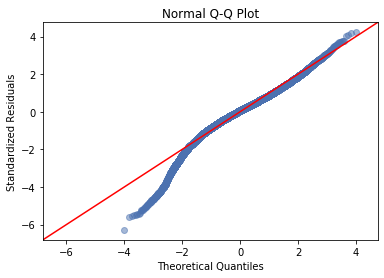

In [38]:
### 2.Q-Q Plot
QQ = ProbPlot(model_norm_residuals)
plot_qq = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_qq.axes[0].set_title('Normal Q-Q Plot')
plot_qq.axes[0].set_xlabel('Theoretical Quantiles')
plot_qq.axes[0].set_ylabel('Standardized Residuals')
plt.show()

##The residuals are not exactly normally distributed ---> try take log on X

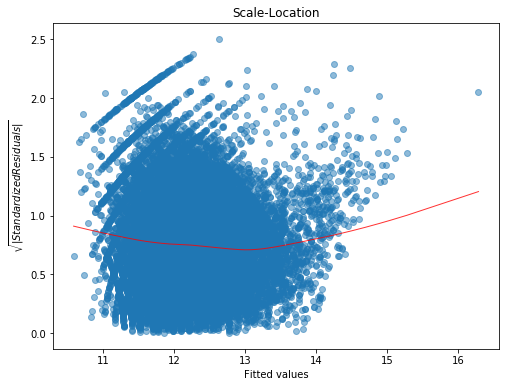

In [39]:
#Homoscedasticity test ---> Scale-Location plot
fig,ax = plt.subplots(figsize=(8,6))
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt,scatter=False,ci=False,lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
ax.set_title('Scale-Location')
ax.set_xlabel('Fitted values')
ax.set_ylabel('$\sqrt{|Standardized Residuals|}$')
plt.show()

##The variance are increasing --> behavior of Y not fully explained --> try take log on X

In [40]:
df_x.columns
#It only makes sense to try log-transformation on ['FMR','ZINC2','ZSMHC','OTHERCOST']

Index(['AGE1', 'METRO3', 'FMR', 'BEDRMS', 'BUILT', 'PER', 'ZINC2', 'ZSMHC',
       'OTHERCOST', 'REGION_1', 'REGION_2', 'REGION_3', 'REGION_4', 'ZADEQ_1',
       'ZADEQ_2', 'ZADEQ_3'],
      dtype='object')

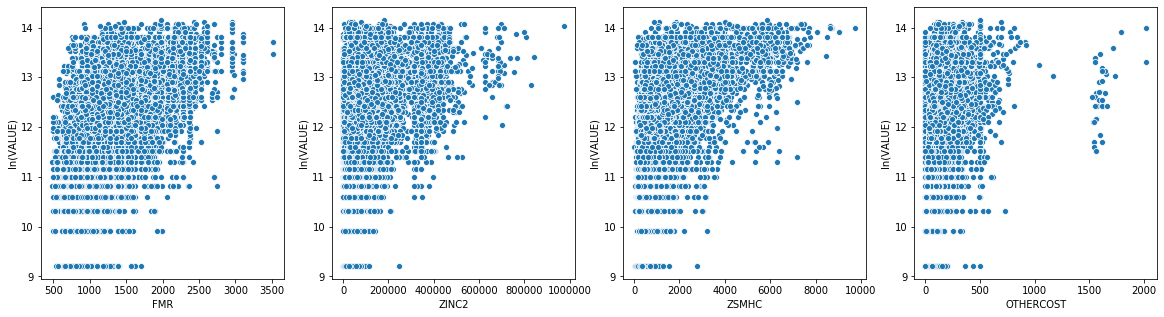

In [41]:
fig,ax=plt.subplots(1,4,figsize=(20,5))
for i,j in enumerate(['FMR','ZINC2','ZSMHC','OTHERCOST']):
    sns.scatterplot(df_x[j],np.log(df_y),ax=ax[i])
    ax[i].set_ylabel('ln(VALUE)')
plt.show()

## there exists some degrees of log-linear relationships for FMR,ZINC2,ZSMHC

In [42]:
#log transformation on FMR, ZINC2, ZSMHC
df_x['FMR']=np.log(df_x['FMR'])
df_x['ZINC2']=np.log(df_x['ZINC2'])
df_x['ZSMHC']=np.log(df_x['ZSMHC'])
df_x.rename(columns={'FMR':'ln(FMR)','ZINC2':'ln(ZINC2)','ZSMHC':'ln(ZSMHC)'},inplace=True)

In [43]:
#fit again
results=sm.OLS(np.log(df_y),sm.add_constant(df_x)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  VALUE   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     2366.
Date:                Wed, 20 May 2020   Prob (F-statistic):               0.00
Time:                        18:26:43   Log-Likelihood:                -25002.
No. Observations:               31061   AIC:                         5.003e+04
Df Residuals:                   31046   BIC:                         5.016e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3021      0.174     -7.478      0.000      -1.643      -0.961
AGE1           0.0078      0.000     33.914      0.000       0.007       0.008
METRO3        -0.1011      0.008    -13.198      0.000      -0.116      -0.086
ln(FMR)        0.6114      0.017     36.771      0.000       0.579       0.644
BEDRMS         0.0552      0.005     11.540      0.000       0.046       0.065
BUILT          0.0026      0.000     20.511      0.000       0.002       0.003
PER           -0.0309      0.003    -12.337      0.000      -0.036      -0.026
ln(ZINC2)      0.1192      0.003     34.710      0.000       0.112       0.126
ln(ZSMHC)      0.3855      0.006     69.057      0.000       0.375       0.396
OTHERCOST      0.0009   3.37e-05     25.523      0.000       0.001       0.001
REGION_1      -0.2656      0.044     -6.084      0.000      -0.351      -0.180
REGION_2      -0.4530      0.042    -10.736      0.000      -0.536      -0.370
REGION_3      -0.4040      0.044     -9.161      0.000      -0.490      -0.318
REGION_4      -0.1794      0.046     -3.917      0.000      -0.269      -0.090
ZADEQ_1       -0.3229      0.060     -5.383      0.000      -0.441      -0.205
ZADEQ_2       -0.5400      0.060     -8.959      0.000      -0.658      -0.422
ZADEQ_3       -0.4392      0.062     -7.070      0.000      -0.561      -0.317
==============================================================================
Omnibus:                     2899.617   Durbin-Watson:                   1.842
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8348.988
Skew:                          -0.511   Prob(JB):                         0.00
Kurtosis:                       5.325   Cond. No.                     2.58e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.81e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [44]:
# fitted values
model_fitted_y = results.fittedvalues
# residuals
model_residuals = results.resid
# normalized residuals
model_norm_residuals = results.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

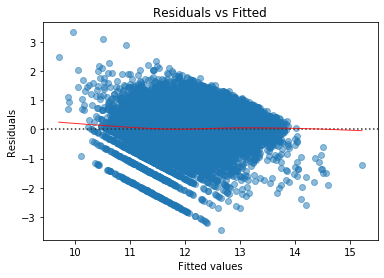

In [45]:
#Normality of residuals tests
#1.Residuals vs Fitted values
plot_lm = plt.figure()
plot_lm.axes[0] = sns.residplot(model_fitted_y, np.log(df_y),
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm.axes[0].set_title('Residuals vs Fitted')
plot_lm.axes[0].set_xlabel('Fitted values')
plot_lm.axes[0].set_ylabel('Residuals')
plt.show()

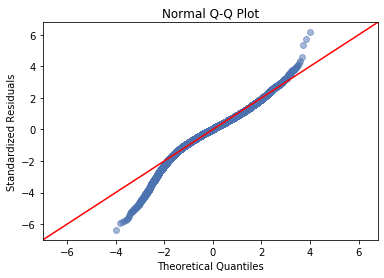

In [46]:
### 2.Q-Q Plot
QQ = ProbPlot(model_norm_residuals)
plot_qq = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_qq.axes[0].set_title('Normal Q-Q Plot')
plot_qq.axes[0].set_xlabel('Theoretical Quantiles')
plot_qq.axes[0].set_ylabel('Standardized Residuals')
plt.show()

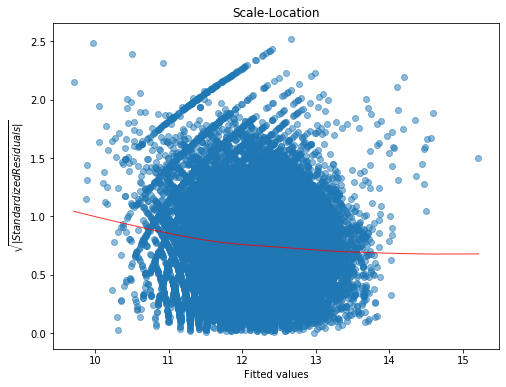

In [47]:
#Homoscedasticity test ---> Scale-Location plot
fig,ax = plt.subplots(figsize=(8,6))
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt,scatter=False,ci=False,lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
ax.set_title('Scale-Location')
ax.set_xlabel('Fitted values')
ax.set_ylabel('$\sqrt{|Standardized Residuals|}$')
plt.show()



### Not much of an improvement, but taking log on Y and X helps explain the model (elasticity)

In [48]:
df_x.columns

Index(['AGE1', 'METRO3', 'ln(FMR)', 'BEDRMS', 'BUILT', 'PER', 'ln(ZINC2)',
       'ln(ZSMHC)', 'OTHERCOST', 'REGION_1', 'REGION_2', 'REGION_3',
       'REGION_4', 'ZADEQ_1', 'ZADEQ_2', 'ZADEQ_3'],
      dtype='object')

### Model for Task 1: 
#### ln(VALUE)~AGE1+METRO3+ln(FMR)+BEDRMS+BUILT+PER+ln(ZINC2)+ln(ZSMHC)+OTHERCOST+REGION(1,2,3,4)+ZADEQ(1,2,3)

# 2. Task 2

## 2.1 Data merging and clearning

- Follow the similar steps as in Task 1

In [49]:
df=df_2011.merge(df_2013[['CONTROL','VALUE']],on='CONTROL',how='inner')

In [50]:
variable_lst=['CONTROL', 'AGE1', 'METRO3', 'REGION', 'LMED', 'FMR','IPOV', 'BEDRMS', 'BUILT', 
            'STATUS', 'TYPE','NUNITS', 'ROOMS','PER', 'ZINC2', 'ZADEQ', 'ZSMHC','STRUCTURETYPE', 
            'OWNRENT','UTILITY', 'OTHERCOST','COST06', 'COST12','COST08', 'COSTMED','ASSISTED','VALUE_y']
df=df.loc[:,variable_lst]

In [51]:
df

,CONTROL,AGE1,METRO3,REGION,LMED,FMR,IPOV,BEDRMS,BUILT,STATUS,...,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,ASSISTED,VALUE_y
0,'100003130103',-9,'3','1',75030,1152,-9,3,2006,'3',...,1,'1',0.000000,185.000000,1514.190945,2286.502675,1755.776233,1428.966664,-9,40000
1,'100006110249',40,'5','3',55770,1003,11572,4,1980,'1',...,1,'1',220.500000,41.666667,1092.911007,1575.605838,1243.901812,1039.645832,-9,130000
2,'100006520140',65,'5','3',55770,895,13403,3,1985,'1',...,1,'1',230.000000,40.333333,1931.822015,2897.211676,2233.803625,1825.291663,-9,200000
3,'100007130148',-9,'1','3',62084,711,-9,2,1980,'3',...,3,'2',164.000000,0.000000,753.000000,753.000000,753.000000,753.000000,-9,-6
4,'100007390148',54,'2','3',63499,673,11536,1,1985,'1',...,4,'2',116.833333,0.000000,467.000000,467.000000,467.000000,467.000000,1,-6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46376,'999900022228',48,'1','1',64200,1403,27127,2,1990,'1',...,1,'2',61.000000,0.000000,1161.000000,1161.000000,1161.000000,1161.000000,0,-6
46377,'999900022229',30,'1','3',69100,891,17960,2,2010,'1',...,1,'2',142.500000,0.000000,543.000000,543.000000,543.000000,543.000000,0,-6
46378,'999900022231',56,'3','4',67985,1615,23524,3,1950,'1',...,1,'1',227.583333,87.500000,2641.167488,3992.713014,3063.941741,2492.024995,-9,-6
46379,'999900022232',23,'4','2',61959,663,11642,2,1930,'1',...,2,'2',0.000000,0.000000,650.000000,650.000000,650.000000,650.000000,0,-6


In [52]:
df.isnull().any()

CONTROL          False
AGE1             False
METRO3           False
REGION           False
LMED             False
FMR              False
IPOV             False
BEDRMS           False
BUILT            False
STATUS           False
TYPE             False
NUNITS           False
ROOMS            False
PER              False
ZINC2            False
ZADEQ            False
ZSMHC            False
STRUCTURETYPE    False
OWNRENT          False
UTILITY          False
OTHERCOST        False
COST06           False
COST12           False
COST08           False
COSTMED          False
ASSISTED         False
VALUE_y          False
dtype: bool

In [53]:
df = df[(df['TYPE']==1) & (df['STRUCTURETYPE']==1)&
             (df['VALUE_y']>=1000)]

In [54]:
df

,CONTROL,AGE1,METRO3,REGION,LMED,FMR,IPOV,BEDRMS,BUILT,STATUS,...,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,ASSISTED,VALUE_y
0,'100003130103',-9,'3','1',75030,1152,-9,3,2006,'3',...,1,'1',0.000000,185.000000,1514.190945,2286.502675,1755.776233,1428.966664,-9,40000
1,'100006110249',40,'5','3',55770,1003,11572,4,1980,'1',...,1,'1',220.500000,41.666667,1092.911007,1575.605838,1243.901812,1039.645832,-9,130000
2,'100006520140',65,'5','3',55770,895,13403,3,1985,'1',...,1,'1',230.000000,40.333333,1931.822015,2897.211676,2233.803625,1825.291663,-9,200000
5,'100007540148',48,'1','3',62084,935,17849,3,1985,'1',...,1,'1',236.333333,108.333333,1467.833015,2120.436427,1671.972584,1395.818498,-9,260000
7,'100008960141',58,'5','4',53995,1224,14895,3,1985,'1',...,1,'1',217.666667,55.000000,1203.100328,1743.718539,1372.210030,1143.443331,-9,170000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46302,'999900022045',72,'1','4',61000,811,10635,2,1985,'1',...,1,'1',207.666667,76.333333,1879.029134,2805.803209,2168.931480,1776.759997,-9,250000
46307,'999900022051',55,'1','4',61000,1181,27127,3,1960,'1',...,1,'1',255.250000,35.000000,1220.683662,1761.301872,1389.793363,1161.026665,-9,150000
46312,'999900022056',26,'1','4',61000,1416,17960,4,2008,'1',...,1,'1',249.583333,27.500000,1008.138353,1432.909804,1141.010262,961.264998,-9,220000
46315,'999900022059',48,'1','4',61000,1181,11536,3,1950,'1',...,1,'1',437.333333,50.000000,1417.766995,1958.385205,1586.876696,1358.109998,-9,240000


In [55]:
#Group variables according to their datatypes
type_dct = {str(k): list(v) for k, v in df.groupby(df.dtypes, axis=1)}
type_dct['object'].remove('CONTROL')
cat_lst=type_dct['object']
print('Categorical variables:',cat_lst)

int_lst=type_dct['int64']
float_lst=type_dct['float64']
cont_lst=int_lst+float_lst
print('Continuous variables:',cont_lst)

Categorical variables: ['METRO3', 'REGION', 'STATUS', 'ZADEQ', 'OWNRENT']
Continuous variables: ['AGE1', 'LMED', 'FMR', 'IPOV', 'BEDRMS', 'BUILT', 'TYPE', 'NUNITS', 'ROOMS', 'PER', 'ZINC2', 'ZSMHC', 'STRUCTURETYPE', 'ASSISTED', 'VALUE_y', 'UTILITY', 'OTHERCOST', 'COST06', 'COST12', 'COST08', 'COSTMED']


### Continuous variables

In [56]:
#Check for negative values in continuous variables
neg_lst=df[cont_lst].columns[df[cont_lst].describe().T['min']<0]
neg_lst
#These variables have negative values,examine them

Index(['AGE1', 'IPOV', 'PER', 'ZINC2', 'ZSMHC', 'ASSISTED'], dtype='object')

In [57]:
#These are error entries. Drop them from the dataframe
df[neg_lst][(df[neg_lst]<0).all(1)]

,AGE1,IPOV,PER,ZINC2,ZSMHC,ASSISTED
0,-9,-9,-6,-6,-6,-9
28,-9,-9,-6,-6,-6,-9
117,-9,-9,-6,-6,-6,-9
123,-9,-9,-6,-6,-6,-9
221,-9,-9,-6,-6,-6,-9
...,...,...,...,...,...,...
45721,-9,-9,-6,-6,-6,-9
45794,-9,-9,-6,-6,-6,-9
45832,-9,-9,-6,-6,-6,-9
46077,-9,-9,-6,-6,-6,-9


In [58]:
error=df[neg_lst][(df[neg_lst]<0).all(1)].index
df.drop(error,axis=0,inplace=True)
#drop also ZINC2<0 for later log-transformation
df=df[df.ZINC2>0]

In [59]:
df[cont_lst].columns[df[cont_lst].describe().T['std']==0]
#we delete columns with std==0,meaning that they are homoegeneous

Index(['TYPE', 'NUNITS', 'STRUCTURETYPE'], dtype='object')

In [60]:
#Since most of ASSISTED are unknown, we remove them altogether
df.ASSISTED.value_counts()

-9    21621
 0      759
 1       18
Name: ASSISTED, dtype: int64

In [61]:
df.drop(columns=['TYPE','NUNITS','STRUCTURETYPE','ASSISTED'],inplace=True)

In [62]:
cont_lst=[x for x in cont_lst if x not in ['TYPE','NUNITS','STRUCTURETYPE','ASSISTED']]

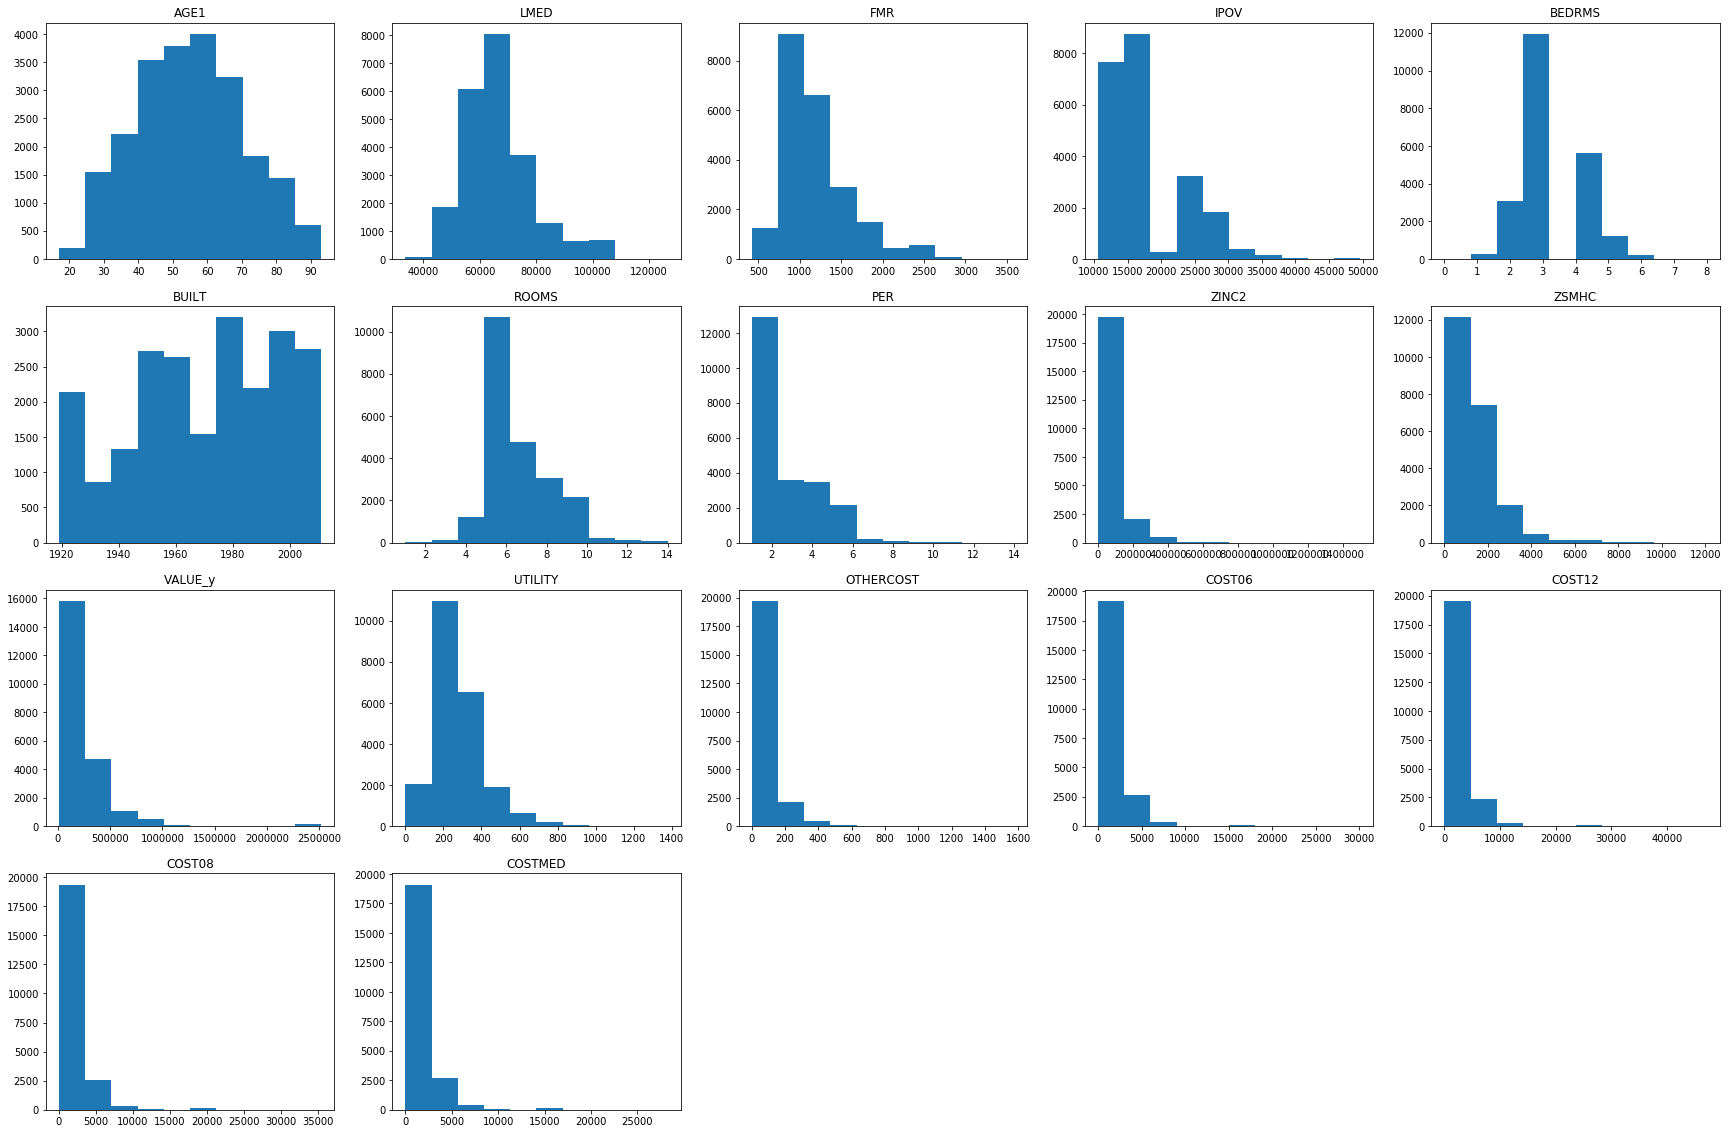

In [63]:
#plot all continuous variables
fig, axes = plt.subplots(4,5, figsize=(30, 20))
counter=0
for i in range(4):
    for j in range(5):
        ax=axes[i][j]
        if counter<len(cont_lst):
            ax.hist(df[cont_lst[counter]])
            ax.set_title(cont_lst[counter])
        else:
            ax.set_axis_off()
        counter+=1
plt.show()

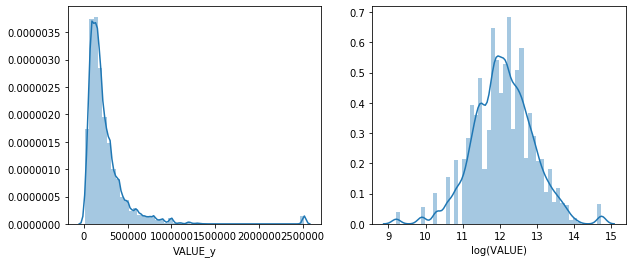

In [64]:
#distplot VALUE and log(VALUE)
fig,ax=plt.subplots(1,2,figsize=(10,4))
sns.distplot(df['VALUE_y'],ax=ax[0])
sns.distplot(np.log(df['VALUE_y']),ax=ax[1])
ax[1].set(xlabel='log(VALUE)')
plt.show()
#log(VALUE) mostly conforms the normal distribution and we will use this as the response variable in the following
#We can discover there are outliers at VALUE>2500000

In [65]:
#Remove outliers
df=df[df.VALUE_y<2500000]

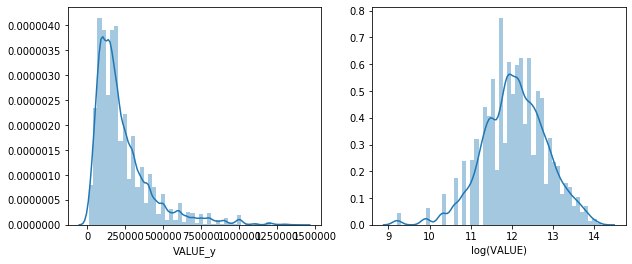

In [66]:
fig,ax=plt.subplots(1,2,figsize=(10,4))
sns.distplot(df['VALUE_y'],ax=ax[0])
sns.distplot(np.log(df['VALUE_y']),ax=ax[1])
ax[1].set(xlabel='log(VALUE)')
plt.show()

### Categorical variables

In [67]:
df[cat_lst].describe().T

,count,unique,top,freq
METRO3,22237,5,'2',8115
REGION,22237,4,'3',8242
STATUS,22237,1,'1',22237
ZADEQ,22237,3,'1',21623
OWNRENT,22237,2,'1',21466


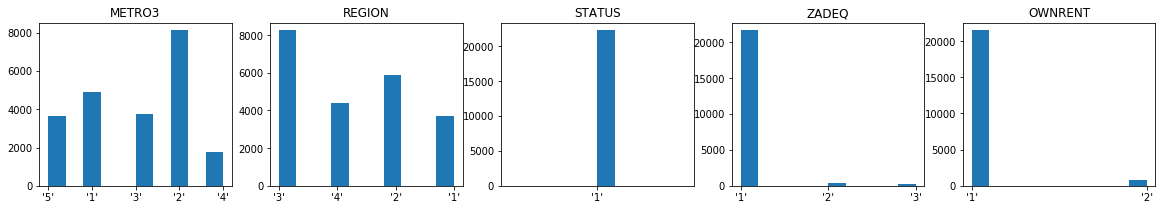

In [68]:
#plot categorical variables
plt.figure(figsize=(20,3))
for i in range(5):
        plt.subplot(1,5,i+1)
        plt.hist(df.loc[:,cat_lst[i]])
        plt.title(cat_lst[i])

- Drop STATUS. Add dummies for METRO3, REGION,OWNRENT, ZADEQ

In [69]:
df.drop(columns=['STATUS'],inplace=True)
df['METRO3'] = df['METRO3'].apply(lambda x: 1 if x=="'1'" else 0)
df['OWNRENT'] = df['OWNRENT'].apply(lambda x: 1 if x=="'1'" else 0)
df['REGION']=df['REGION'].str.replace("'","")
df['ZADEQ']=df['ZADEQ'].str.replace("'","")
df_whole=df.copy()

In [70]:
df = pd.get_dummies(df,columns = ['REGION','ZADEQ'],prefix_sep='_')

In [71]:
df

,CONTROL,AGE1,METRO3,LMED,FMR,IPOV,BEDRMS,BUILT,ROOMS,PER,...,COST08,COSTMED,VALUE_y,REGION_1,REGION_2,REGION_3,REGION_4,ZADEQ_1,ZADEQ_2,ZADEQ_3
1,'100006110249',40,0,55770,1003,11572,4,1980,8,1,...,1243.901812,1039.645832,130000,0,0,1,0,1,0,0
2,'100006520140',65,0,55770,895,13403,3,1985,5,2,...,2233.803625,1825.291663,200000,0,0,1,0,1,0,0
5,'100007540148',48,1,62084,935,17849,3,1985,6,3,...,1671.972584,1395.818498,260000,0,0,1,0,1,0,0
7,'100008960141',58,0,53995,1224,14895,3,1985,7,2,...,1372.210030,1143.443331,170000,0,0,0,1,1,0,0
9,'100010190149',57,0,55770,895,14849,3,1985,5,2,...,1999.956595,1632.295830,230000,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46302,'999900022045',72,1,61000,811,10635,2,1985,6,1,...,2168.931480,1776.759997,250000,0,0,0,1,1,0,0
46307,'999900022051',55,1,61000,1181,27127,3,1960,8,5,...,1389.793363,1161.026665,150000,0,0,0,1,1,0,0
46312,'999900022056',26,1,61000,1416,17960,4,2008,6,3,...,1141.010262,961.264998,220000,0,0,0,1,1,0,0
46315,'999900022059',48,1,61000,1181,11536,3,1950,5,1,...,1586.876696,1358.109998,240000,0,0,0,1,1,0,0


## 2.2 Subset Selection and Model Building

In [72]:
df_x=df.drop(columns=['CONTROL','VALUE_y'])
df_y=df.VALUE_y
df_whole=df_whole.drop(columns=['CONTROL','VALUE_y'])

In [73]:
df_x.columns

Index(['AGE1', 'METRO3', 'LMED', 'FMR', 'IPOV', 'BEDRMS', 'BUILT', 'ROOMS',
       'PER', 'ZINC2', 'ZSMHC', 'OWNRENT', 'UTILITY', 'OTHERCOST', 'COST06',
       'COST12', 'COST08', 'COSTMED', 'REGION_1', 'REGION_2', 'REGION_3',
       'REGION_4', 'ZADEQ_1', 'ZADEQ_2', 'ZADEQ_3'],
      dtype='object')

In [74]:
#detect correlation among independent variables
df_whole.corr().abs().unstack().sort_values(ascending=False).drop_duplicates()[:10]

COSTMED  COSTMED    1.000000
         COST06     0.999947
COST08   COST06     0.999726
         COST12     0.999450
         COSTMED    0.999431
COST06   COST12     0.998400
COST12   COSTMED    0.997764
IPOV     PER        0.990616
ROOMS    BEDRMS     0.743250
LMED     FMR        0.665312
dtype: float64

- Remove COST06, COST08,COST12 since they are redundant. For the same reason, remove IPOV and ROOMS

In [75]:
df_x=df_x.drop(columns=['IPOV','ROOMS','COST06','COST08','COST12'])
df_whole=df_whole.drop(columns=['IPOV','ROOMS','COST06','COST08','COST12'])

In [76]:
#split training set and validation set - no transformation
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=1000, random_state=1)

In [77]:
#Backward Elimination - without log-transformation
def train_model(variables): 
    model = LinearRegression()
    model.fit(X_train[variables], y_train)
    return model

def score_model(model, variables):
    return mean_absolute_error(y_train, model.predict(X_train[variables]))

allVariables = X_train.columns
best_model, best_variables = backward_elimination(allVariables, train_model, 
                                 score_model, verbose=True)

print(best_variables)

regressionSummary(y_test, best_model.predict(X_test[best_variables]))
r2 = best_model.score(X_test[best_variables], y_test)
print('R-square:',r2)

Variables: AGE1, METRO3, LMED, FMR, BEDRMS, BUILT, PER, ZINC2, ZSMHC, OWNRENT, UTILITY, OTHERCOST, COSTMED, REGION_1, REGION_2, REGION_3, REGION_4, ZADEQ_1, ZADEQ_2, ZADEQ_3
Start: score=72742.51
Step: score=72723.39, remove BEDRMS
Step: score=72723.39, remove REGION_1
Step: score=72723.01, remove REGION_2
Step: score=72723.01, remove None
['AGE1', 'METRO3', 'LMED', 'FMR', 'BUILT', 'PER', 'ZINC2', 'ZSMHC', 'OWNRENT', 'UTILITY', 'OTHERCOST', 'COSTMED', 'REGION_3', 'REGION_4', 'ZADEQ_1', 'ZADEQ_2', 'ZADEQ_3']

Regression statistics

                      Mean Error (ME) : -1152.1096
       Root Mean Squared Error (RMSE) : 119407.3534
            Mean Absolute Error (MAE) : 71812.6336
          Mean Percentage Error (MPE) : -34.4716
Mean Absolute Percentage Error (MAPE) : 52.9419
R-square: 0.5972180915638217


In [78]:
results = sm.OLS(y_train, sm.add_constant(X_train)).fit()
results.summary()

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                VALUE_y   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     1714.
Date:                Wed, 20 May 2020   Prob (F-statistic):               0.00
Time:                        18:28:23   Log-Likelihood:            -2.7844e+05
No. Observations:               21237   AIC:                         5.569e+05
Df Residuals:                   21218   BIC:                         5.571e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.673e+05   4.28e+04     -8.588      0.000   -4.51e+05   -2.83e+05
AGE1         664.5470     61.943     10.728      0.000     543.134     785.960
METRO3     -1.017e+04   2029.903     -5.012      0.000   -1.42e+04   -6194.620
LMED           0.8121      0.113      7.166      0.000       0.590       1.034
FMR           79.6767      4.106     19.405      0.000      71.629      87.725
BEDRMS      4359.4078   1278.660      3.409      0.001    1853.137    6865.679
BUILT        255.1921     34.192      7.463      0.000     188.173     322.212
PER        -3925.0484    687.899     -5.706      0.000   -5273.383   -2576.714
ZINC2          0.3029      0.013     23.275      0.000       0.277       0.328
ZSMHC         20.6451      1.177     17.546      0.000      18.339      22.951
OWNRENT    -3.864e+04   4556.252     -8.482      0.000   -4.76e+04   -2.97e+04
UTILITY      -25.8041      7.668     -3.365      0.001     -40.834     -10.774
OTHERCOST    -12.1181     10.295     -1.177      0.239     -32.297       8.061
COSTMED       64.8043      0.820     78.999      0.000      63.196      66.412
REGION_1   -9.787e+04   1.06e+04     -9.191      0.000   -1.19e+05    -7.7e+04
REGION_2   -9.919e+04   1.07e+04     -9.303      0.000    -1.2e+05   -7.83e+04
REGION_3   -1.015e+05    1.1e+04     -9.243      0.000   -1.23e+05      -8e+04
REGION_4   -6.875e+04    1.1e+04     -6.228      0.000   -9.04e+04   -4.71e+04
ZADEQ_1    -1.192e+05   1.48e+04     -8.072      0.000   -1.48e+05   -9.03e+04
ZADEQ_2    -1.158e+05   1.49e+04     -7.766      0.000   -1.45e+05   -8.66e+04
ZADEQ_3    -1.323e+05   1.55e+04     -8.543      0.000   -1.63e+05   -1.02e+05
==============================================================================
Omnibus:                     5949.277   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           197346.699
Skew:                           0.696   Prob(JB):                         0.00
Kurtosis:                      17.869   Cond. No.                     1.69e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.12e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [79]:
#log transformation on FMR, ZINC2, ZSMHC,COSTMED, and VALUE
df_y_log=np.log(df_y)
df_x_log=df_x
df_x_log['FMR']=np.log(df_x_log['FMR'])
df_x_log['ZINC2']=np.log(df_x_log['ZINC2'])
df_x_log['ZSMHC']=np.log(df_x_log['ZSMHC'])
df_x_log['COSTMED']=np.log(df_x_log['COSTMED'])
df_x_log.rename(columns={'FMR':'ln(FMR)','ZINC2':'ln(ZINC2)','ZSMHC':'ln(ZSMHC)','COSTMED':'ln(COSTMED)'},inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [80]:
# Remove the negative infinite values for variables with logorithmn transformation
negative=df_x_log[(df_x_log['ln(COSTMED)']<0)|(df_x_log['ln(ZINC2)']<0)|(df_x_log['ln(FMR)']<0)|(df_x_log['ln(ZSMHC)']<0)]
df_x_log=df_x_log.drop(negative.index,axis=0)
df_y_log=df_y_log.drop(negative.index,axis=0)

In [81]:
#split training set and validation set
train_X,valid_X,train_y,valid_y = train_test_split(df_x_log, df_y_log, test_size=1000, random_state=1)

xvar =sm.add_constant(train_X)
results = sm.OLS(train_y, xvar).fit()
y_pred=results.predict(sm.add_constant(valid_X))

In [82]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                VALUE_y   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     1509.
Date:                Wed, 20 May 2020   Prob (F-statistic):               0.00
Time:                        18:28:23   Log-Likelihood:                -15772.
No. Observations:               21223   AIC:                         3.158e+04
Df Residuals:                   21204   BIC:                         3.173e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.4426      0.200     -2.209      0.027      -0.835      -0.050
AGE1            0.0017      0.000      5.948      0.000       0.001       0.002
METRO3         -0.0570      0.009     -6.577      0.000      -0.074      -0.040
LMED         4.941e-06   4.88e-07     10.128      0.000    3.98e-06     5.9e-06
ln(FMR)         0.2656      0.024     11.077      0.000       0.219       0.313
BEDRMS          0.0461      0.006      8.003      0.000       0.035       0.057
BUILT           0.0025      0.000     17.003      0.000       0.002       0.003
PER            -0.0153      0.003     -5.207      0.000      -0.021      -0.010
ln(ZINC2)       0.0729      0.004     17.386      0.000       0.065       0.081
ln(ZSMHC)       0.0352      0.007      4.820      0.000       0.021       0.050
OWNRENT        -0.2989      0.020    -14.954      0.000      -0.338      -0.260
UTILITY        -0.0002   3.31e-05     -7.385      0.000      -0.000      -0.000
OTHERCOST   -3.624e-05   4.34e-05     -0.835      0.404      -0.000    4.88e-05
ln(COSTMED)     0.6543      0.009     75.329      0.000       0.637       0.671
REGION_1       -0.1001      0.050     -2.016      0.044      -0.197      -0.003
REGION_2       -0.1622      0.048     -3.358      0.001      -0.257      -0.068
REGION_3       -0.1643      0.051     -3.204      0.001      -0.265      -0.064
REGION_4       -0.0160      0.053     -0.301      0.764      -0.120       0.088
ZADEQ_1        -0.1104      0.069     -1.603      0.109      -0.245       0.025
ZADEQ_2        -0.1856      0.069     -2.680      0.007      -0.321      -0.050
ZADEQ_3        -0.1465      0.071     -2.051      0.040      -0.287      -0.007
==============================================================================
Omnibus:                     4055.721   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29181.485
Skew:                          -0.732   Prob(JB):                         0.00
Kurtosis:                       8.555   Cond. No.                     4.87e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.07e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [83]:
# Since these variables cannot pass significant t-test, we remove these variables
df_x_log=df_x_log.drop(columns=['REGION_4'])
df_x_log=df_x_log.drop(columns=['OTHERCOST'])
df_x_log=df_x_log.drop(columns=['ZADEQ_1'])
df_x_log=df_x_log.drop(columns=['ZADEQ_3'])

In [84]:
train_X,valid_X,train_y,valid_y = train_test_split(df_x_log, df_y_log, test_size=1000, random_state=1)

results = sm.OLS(train_y, sm.add_constant(train_X)).fit()
y_pred=results.predict(sm.add_constant(valid_X))
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                VALUE_y   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     1698.
Date:                Wed, 20 May 2020   Prob (F-statistic):               0.00
Time:                        18:28:23   Log-Likelihood:                -15773.
No. Observations:               21223   AIC:                         3.158e+04
Df Residuals:                   21206   BIC:                         3.171e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.5395      0.316     -1.706      0.088      -1.159       0.080
AGE1            0.0016      0.000      5.901      0.000       0.001       0.002
METRO3         -0.0570      0.009     -6.578      0.000      -0.074      -0.040
LMED         4.964e-06   4.87e-07     10.198      0.000    4.01e-06    5.92e-06
ln(FMR)         0.2642      0.024     11.049      0.000       0.217       0.311
BEDRMS          0.0465      0.006      8.093      0.000       0.035       0.058
BUILT           0.0025      0.000     17.030      0.000       0.002       0.003
PER            -0.0152      0.003     -5.202      0.000      -0.021      -0.009
ln(ZINC2)       0.0730      0.004     17.420      0.000       0.065       0.081
ln(ZSMHC)       0.0345      0.007      4.768      0.000       0.020       0.049
OWNRENT        -0.2993      0.020    -14.995      0.000      -0.338      -0.260
UTILITY        -0.0002   3.31e-05     -7.371      0.000      -0.000      -0.000
ln(COSTMED)     0.6527      0.008     77.495      0.000       0.636       0.669
REGION_1       -0.0846      0.013     -6.291      0.000      -0.111      -0.058
REGION_2       -0.1470      0.014    -10.570      0.000      -0.174      -0.120
REGION_3       -0.1495      0.011    -13.304      0.000      -0.172      -0.127
ZADEQ_2        -0.0748      0.027     -2.748      0.006      -0.128      -0.021
==============================================================================
Omnibus:                     4060.731   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29126.813
Skew:                          -0.734   Prob(JB):                         0.00
Kurtosis:                       8.548   Cond. No.                     6.11e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.11e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [85]:
regressionSummary(valid_y,y_pred)


Regression statistics

                      Mean Error (ME) : 0.0108
       Root Mean Squared Error (RMSE) : 0.4993
            Mean Absolute Error (MAE) : 0.3356
          Mean Percentage Error (MPE) : -0.0761
Mean Absolute Percentage Error (MAPE) : 2.8225


In [86]:
#Backward Elimination - log-transformation
def train_model(variables): 
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    y_pred=model.predict(train_X[variables])
    return mean_absolute_error(train_y,y_pred)

allVariables = train_X.columns
best_model, best_variables = backward_elimination(allVariables, train_model, 
                                 score_model, verbose=True)

print(best_variables)

regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))
r2 = best_model.score(valid_X[best_variables],valid_y)
print('R-square:',r2)

Variables: AGE1, METRO3, LMED, ln(FMR), BEDRMS, BUILT, PER, ln(ZINC2), ln(ZSMHC), OWNRENT, UTILITY, ln(COSTMED), REGION_1, REGION_2, REGION_3, ZADEQ_2
Start: score=0.34
Step: score=0.34, remove None
['AGE1', 'METRO3', 'LMED', 'ln(FMR)', 'BEDRMS', 'BUILT', 'PER', 'ln(ZINC2)', 'ln(ZSMHC)', 'OWNRENT', 'UTILITY', 'ln(COSTMED)', 'REGION_1', 'REGION_2', 'REGION_3', 'ZADEQ_2']

Regression statistics

                      Mean Error (ME) : 0.0108
       Root Mean Squared Error (RMSE) : 0.4993
            Mean Absolute Error (MAE) : 0.3356
          Mean Percentage Error (MPE) : -0.0761
Mean Absolute Percentage Error (MAPE) : 2.8225
R-square: 0.5260209096470578


In [87]:
#Transform Absolute Error for log-transformed variables for validation set
absolute_error=np.abs(np.exp(valid_y)-np.exp(y_pred))
absolute_error

22166    22870.987639
16209    62800.925775
5708     21919.714339
4342     14933.518442
26830    26233.734887
             ...     
18739    73920.980508
29045    74214.211776
33851    12928.330750
15760    29021.250811
34677    34086.459041
Length: 1000, dtype: float64

In [88]:
mean_absolute_error=np.sum(absolute_error)/1000
mean_absolute_error

69271.2656658021